[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ooACuQR1szbxKso244j2UO-zDUungSMZ#scrollTo=I09zBXcloOr0)

# Problem 3

Use this notebook to write your code for problem 3.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import genfromtxt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
%matplotlib inline

## Load data

In [2]:
import requests

url_dict = {
    'problem3data.txt': 'https://drive.google.com/uc?export=download&id=1DPF-C43F2JuWxtHvkTP99w5r9QNHxd70',
}

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

In [3]:
train_file = 'problem3data.txt'
download_file(train_file)
train_data = genfromtxt(train_file, delimiter='\t')

y_train = train_data[:, 9]
X_train = train_data[:, :9]

Start downloading...
Complete


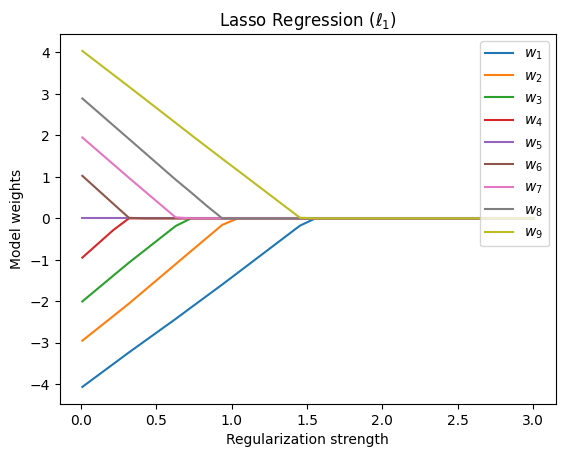

In [12]:
w = np.zeros(shape = (30,9))
alphas = np.linspace(0.01, 3, 30)

for i in range(np.size(w, 0)):
  lasso_reg = Lasso(alpha = alphas[i])
  lasso_reg.fit(X_train, y_train)
  w[i] = lasso_reg.coef_

plt.figure()
plt.title("Lasso Regression ($\ell_1$)")
plt.xlabel("Regularization strength")
plt.ylabel("Model weights")
plt.plot(alphas, w)
plt.legend(["$w_1$", "$w_2$", "$w_3$", "$w_4$", "$w_5$", "$w_6$", "$w_7$",
             "$w_8$", "$w_9$"], loc=1)
plt.show()

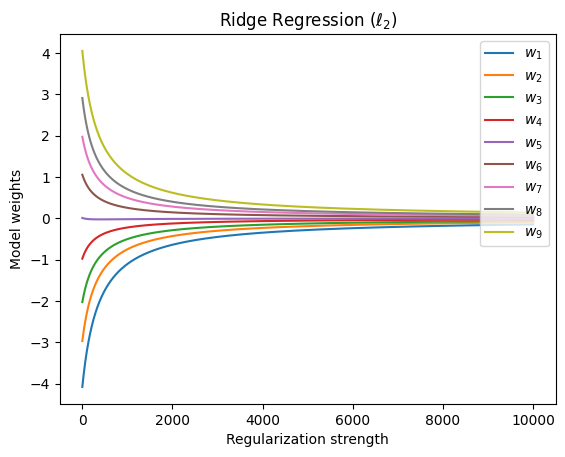

In [13]:
# Ridge Regression
w = np.zeros(shape = (10000,9))
alphas = [a for a in range(1, 10001)]

for i in range(np.size(w, 0)):
  ridge_reg = Ridge(alpha = alphas[i])
  ridge_reg.fit(X_train, y_train)
  w[i] = ridge_reg.coef_

plt.figure()
plt.title("Ridge Regression ($\ell_2$)")
plt.xlabel("Regularization strength")
plt.ylabel("Model weights")
plt.plot(alphas, w)
plt.legend(["$w_1$", "$w_2$", "$w_3$", "$w_4$", "$w_5$", "$w_6$", "$w_7$",
             "$w_8$", "$w_9$"], loc=1)
plt.show()